In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from src.clustering.kmeans import KMeans_Scratch
from src.metrics.internal import (
    calinski_harabasz_score_scratch,
    davies_bouldin_score_scratch,
    silhouette_score_scratch,
    calculate_wcss
)
from src.metrics.external import confusion_matrix_scratch,purity_score_scratch,entropy_scratch,normalized_mutual_information_scratch,adjusted_rand_index_scratch

 


In [3]:
import pandas as pd

df=pd.read_csv('D:\K_means-GMM-Pca-AutoEncoder_From_Scratch\data.csv')

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.drop(columns=['Unnamed: 32'],inplace=True)

In [7]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
df.drop(columns=['id'],inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum().sum()

0

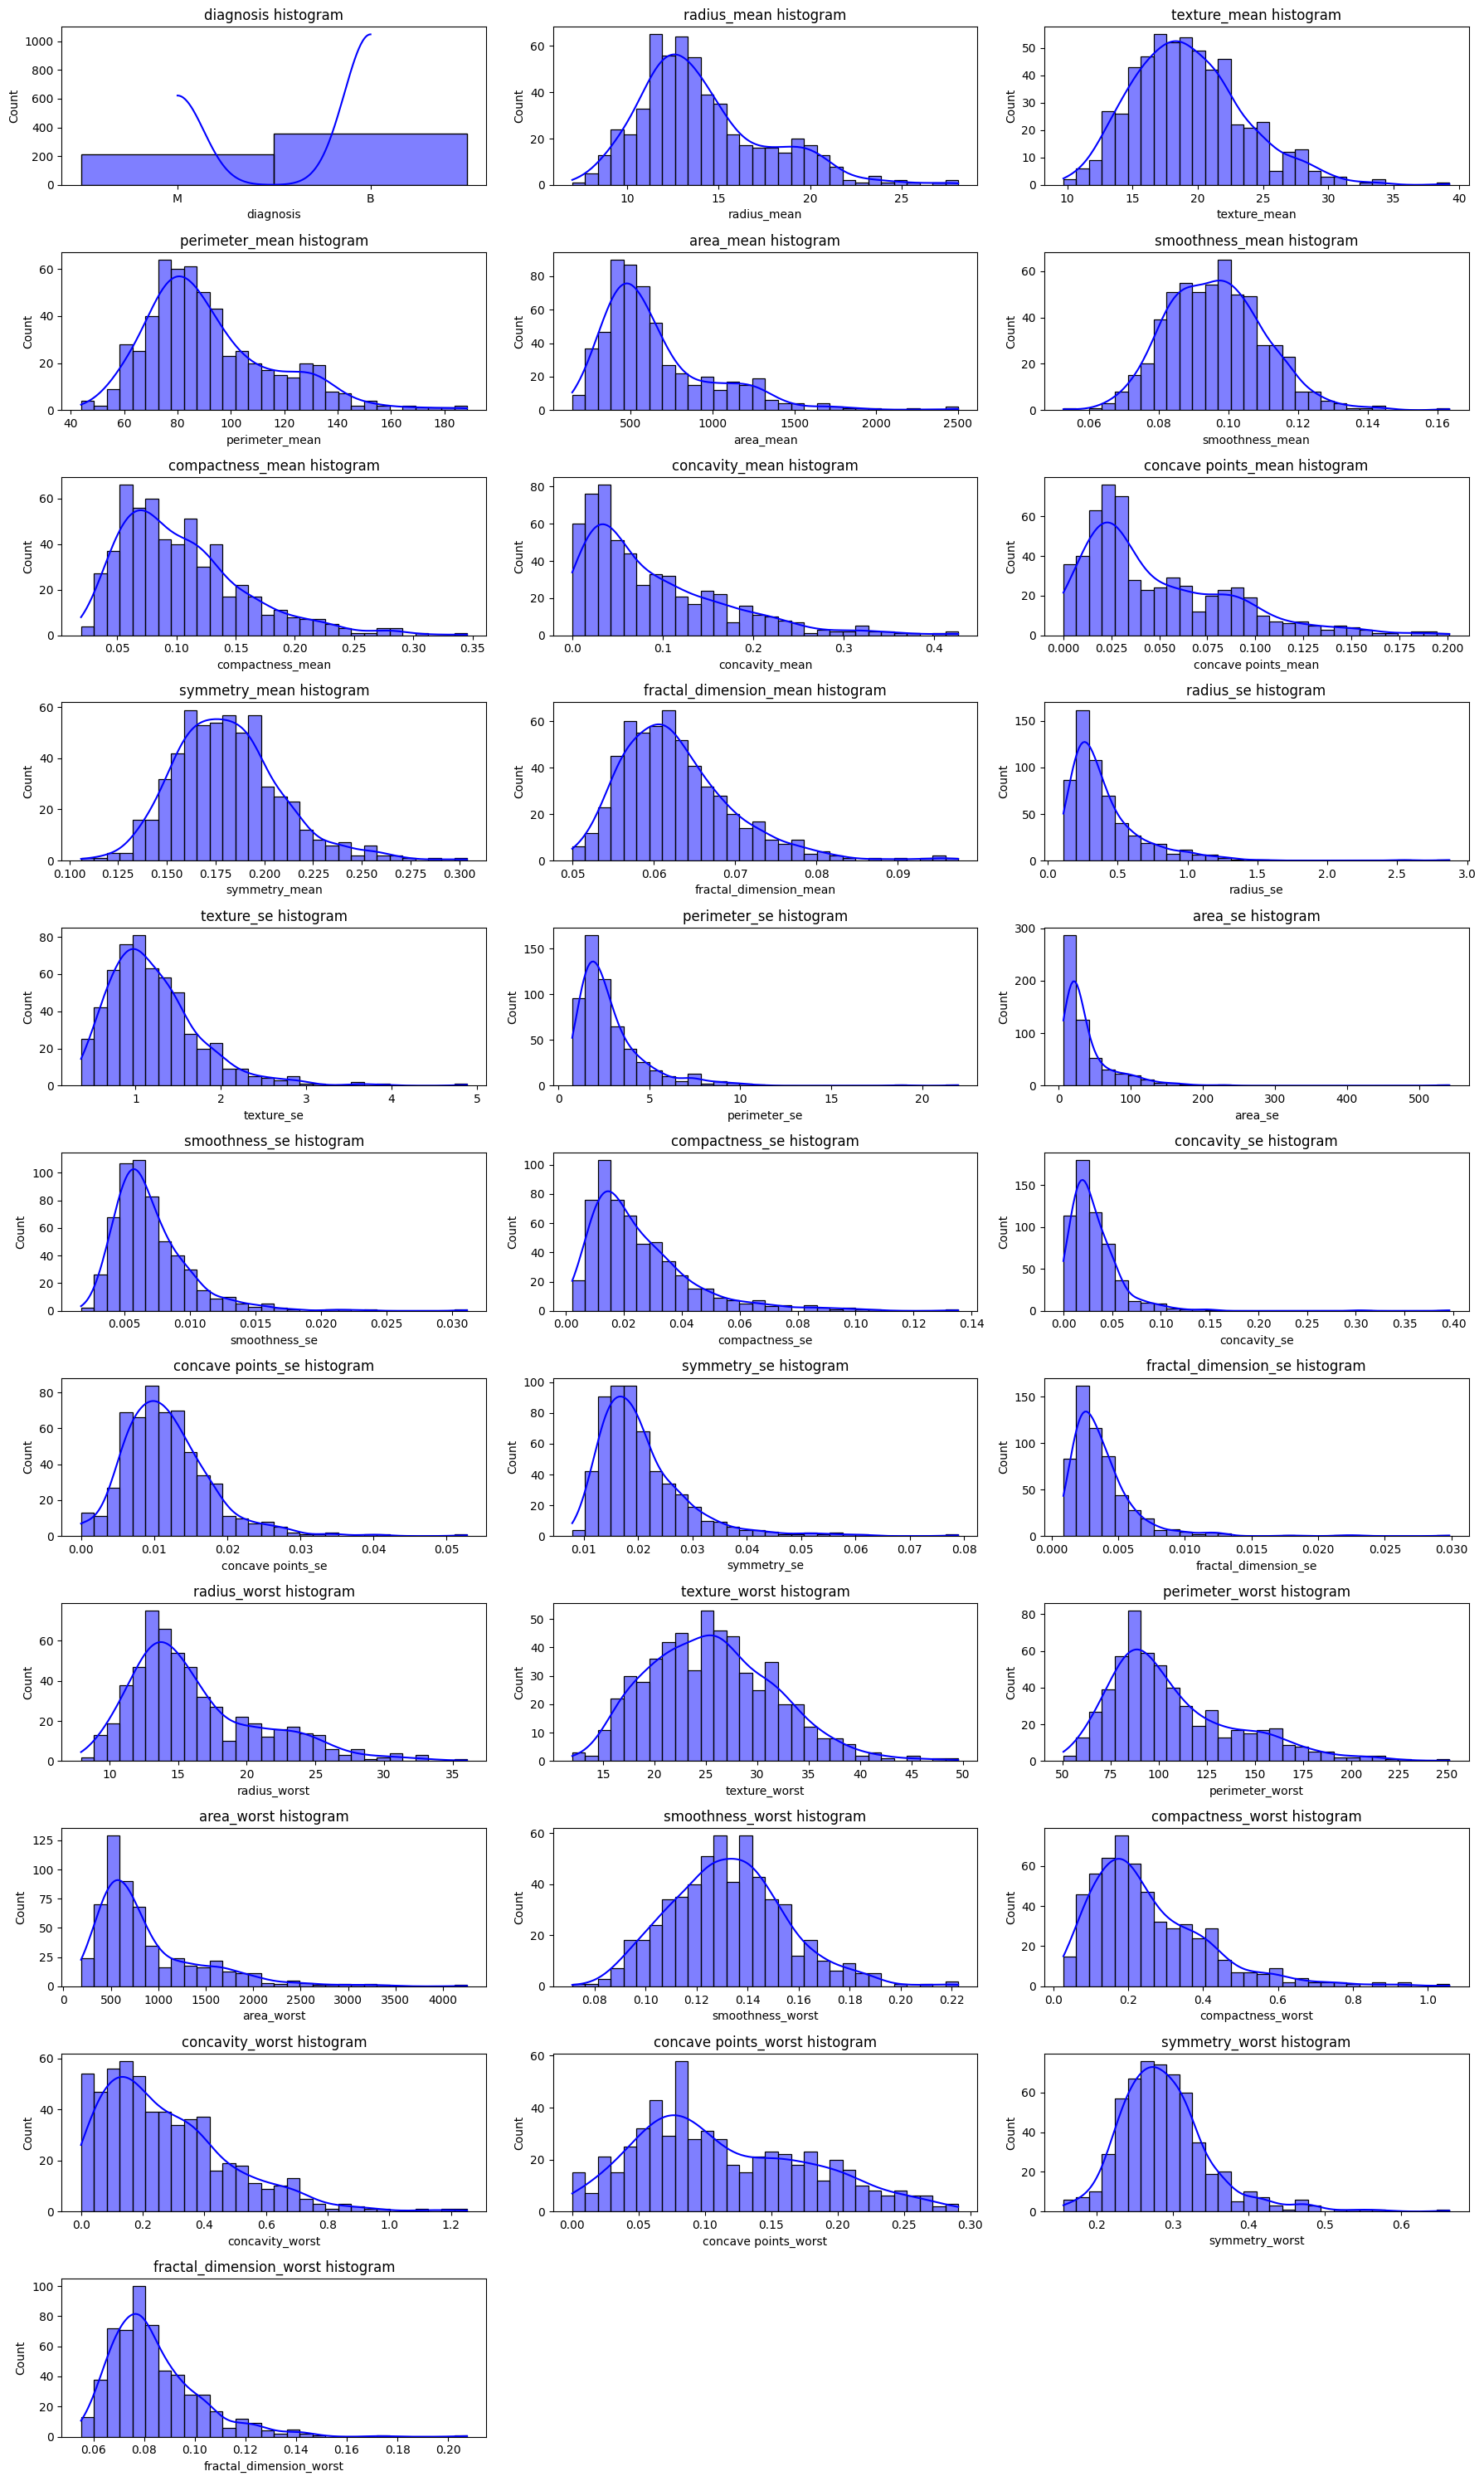

In [11]:
plt.figure(figsize=(18, 30))

for i, bf in enumerate(df.columns):
    plt.subplot(11, 3, i+1)
    sns.histplot(x=bf, data=df, kde=True, color='blue', bins=30)

    plt.title(f'{bf} histogram')
plt.tight_layout()
plt.show()

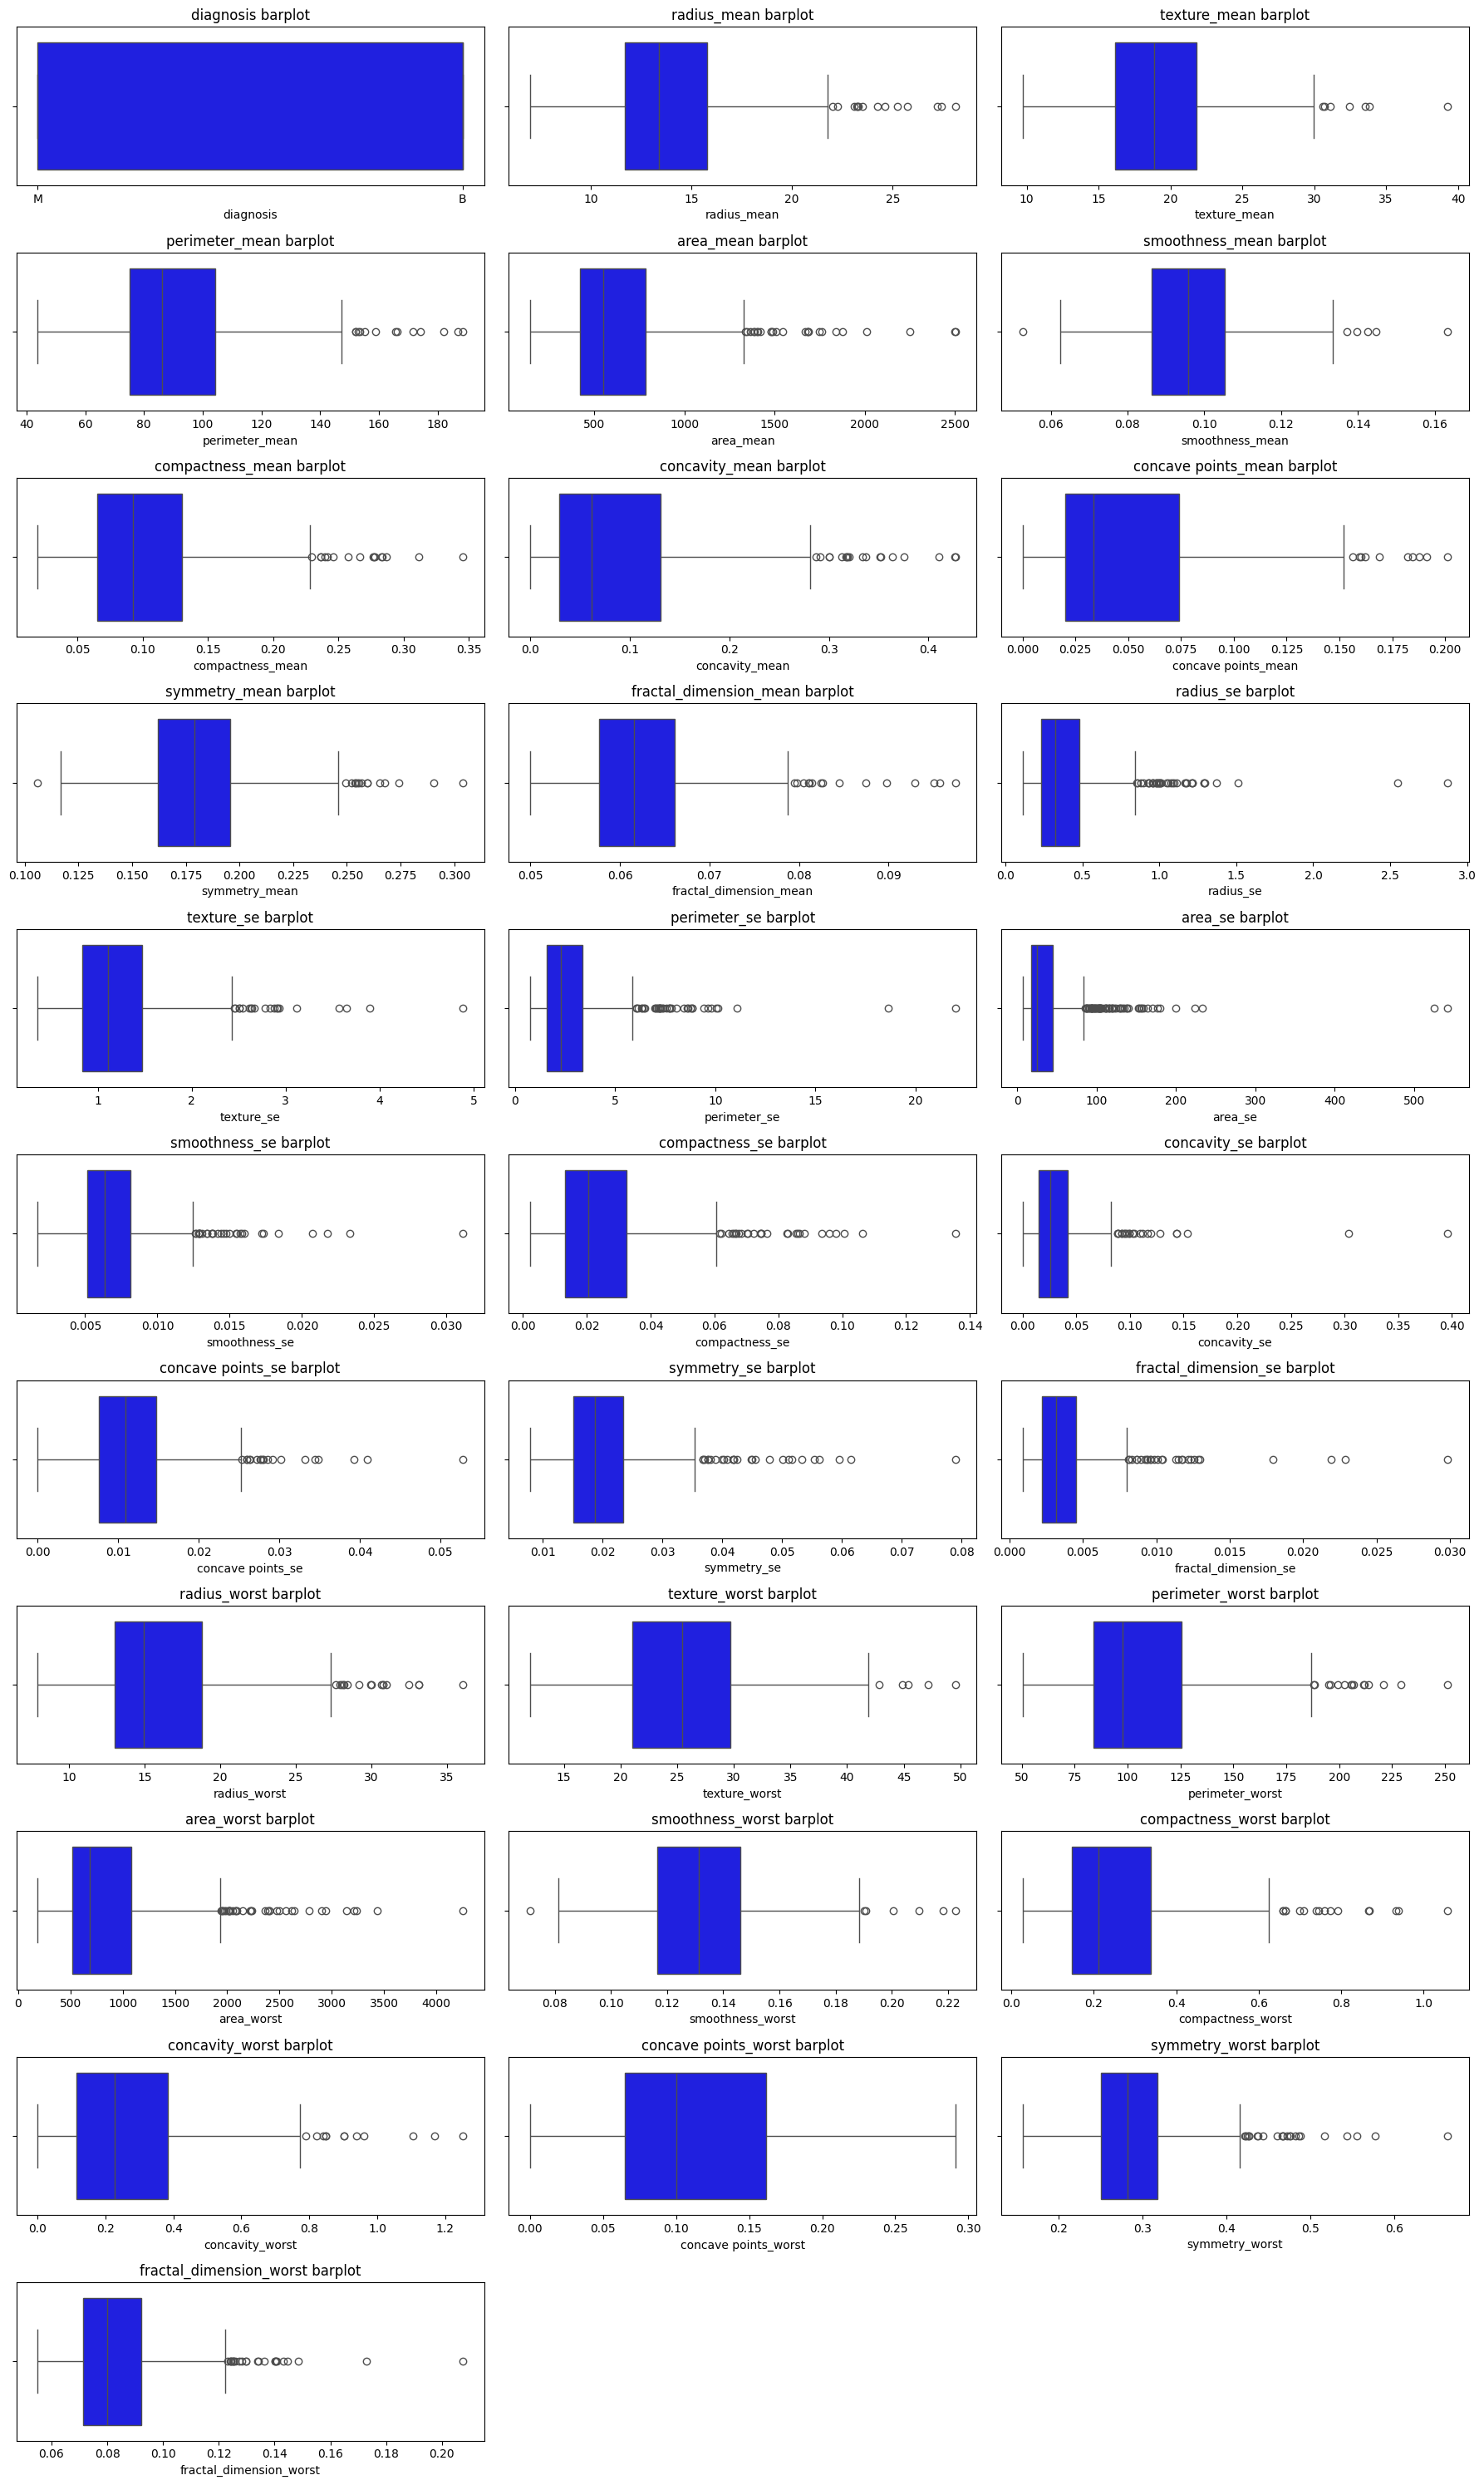

In [12]:
plt.figure(figsize=(18, 30))
for i, bf in enumerate(df.columns):
    plt.subplot(11, 3, i+1)
    sns.boxplot(x=bf, data=df,  color='blue')

    plt.title(f'{bf} barplot')
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

y = df["diagnosis"].map({"M": 1, "B": 0}).values

# Drop diagnosis
X = df.drop(columns=["diagnosis"]).values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




### Expirement 1 

In [14]:
k_values = range(2, 11)
wcss_random = []
wcss_kpp = []

for k in k_values:
    km_random = KMeans_Scratch(n_clusters=k, init_method="random")
    km_random.fit(X_scaled)
    wcss_random.append(km_random.inertia_)
    
    km_kpp = KMeans_Scratch(n_clusters=k, init_method="kmeans++")
    km_kpp.fit(X_scaled)
    wcss_kpp.append(km_kpp.inertia_)

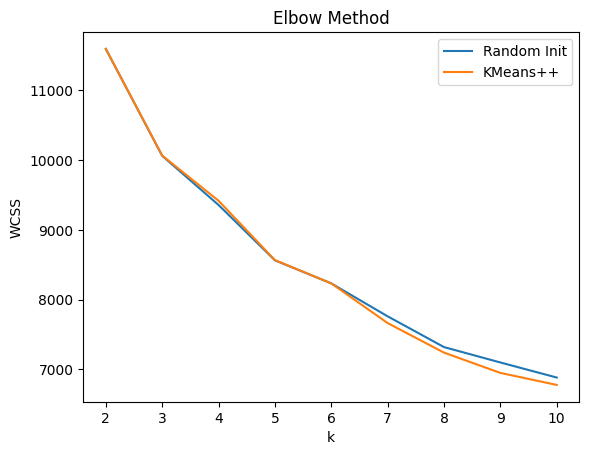

In [15]:
import matplotlib.pyplot as plt

plt.plot(k_values, wcss_random, label="Random Init")
plt.plot(k_values, wcss_kpp, label="KMeans++")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.legend()
plt.show()


In [16]:
from src.metrics.internal import (
    silhouette_score_scratch,
    davies_bouldin_score_scratch,
    calinski_harabasz_score_scratch
)
internal_results = []

for k in k_values:
    model = KMeans_Scratch(n_clusters=k, init_method="kmeans++")
    model.fit(X_scaled)
    labels = model.labels_

    internal_results.append({
        "k": k,
        "silhouette": silhouette_score_scratch(X_scaled, labels),
        "davies_bouldin": davies_bouldin_score_scratch(X_scaled, labels),
        "calinski_harabasz": calinski_harabasz_score_scratch(X_scaled, labels),
        "wcss": model.inertia_
    })


def gap_statistic(X, k, B=10):
    model = KMeans_Scratch(n_clusters=k)
    model.fit(X)
    wcss_real = model.inertia_

    wcss_rand = []
    for _ in range(B):
        X_rand = np.random.uniform(
            low=X.min(axis=0),
            high=X.max(axis=0),
            size=X.shape
        )
        km = KMeans_Scratch(n_clusters=k)
        km.fit(X_rand)
        wcss_rand.append(km.inertia_)

    return np.mean(np.log(wcss_rand)) - np.log(wcss_real)


In [17]:
km_random = KMeans_Scratch(k, init_method="random")
km_random.fit(X_scaled)

km_kpp = KMeans_Scratch(k, init_method="kmeans++")
km_kpp.fit(X_scaled)

print("Random iters:", len(km_random.inertia_history))
print("KMeans++ iters:", len(km_kpp.inertia_history))


Random iters: 13
KMeans++ iters: 13


In [18]:
labels = km_kpp.labels_
ARI = adjusted_rand_index_scratch(y, labels)
NMI = normalized_mutual_information_scratch(y, labels)
Purity = purity_score_scratch(y, labels)


In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, labels)


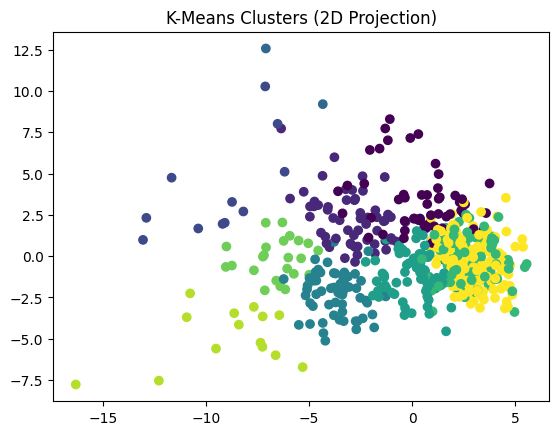

In [20]:
from src.dimensionality_reduction.pca import PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

plt.scatter(X_2d[:,0], X_2d[:,1], c=labels)
plt.title("K-Means Clusters (2D Projection)")
plt.show()


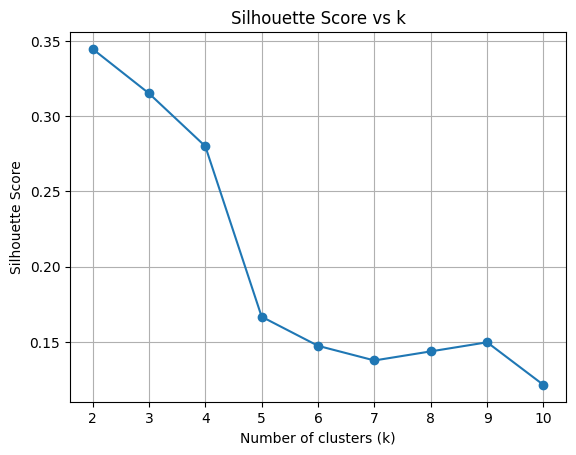

In [21]:


k_vals = [r["k"] for r in internal_results]
sil_vals = [r["silhouette"] for r in internal_results]
db_vals  = [r["davies_bouldin"] for r in internal_results]
ch_vals  = [r["calinski_harabasz"] for r in internal_results]
wcss_vals = [r["wcss"] for r in internal_results]
plt.figure()
plt.plot(k_vals, sil_vals, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")
plt.grid(True)
plt.show()


## EXP 3


Running PCA + KMeans with 2 components


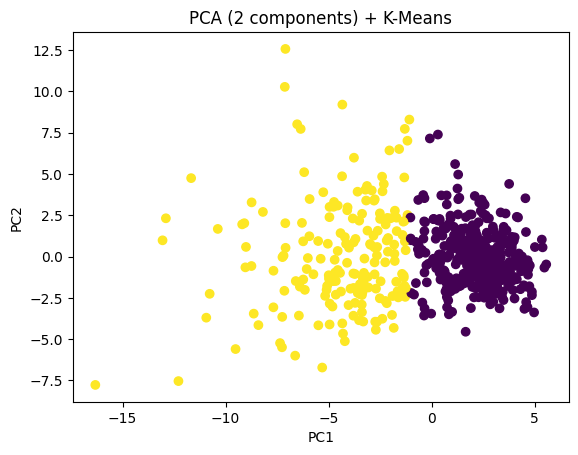


Running PCA + KMeans with 5 components


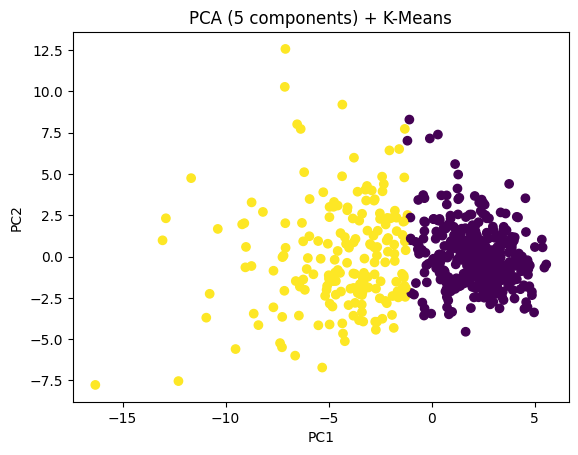


Running PCA + KMeans with 10 components


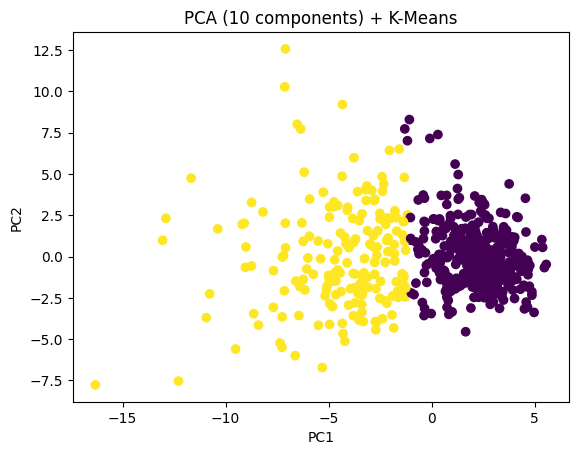


Running PCA + KMeans with 15 components


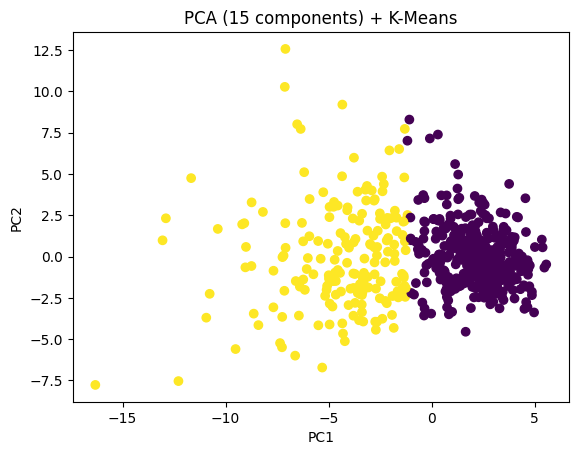


Running PCA + KMeans with 20 components


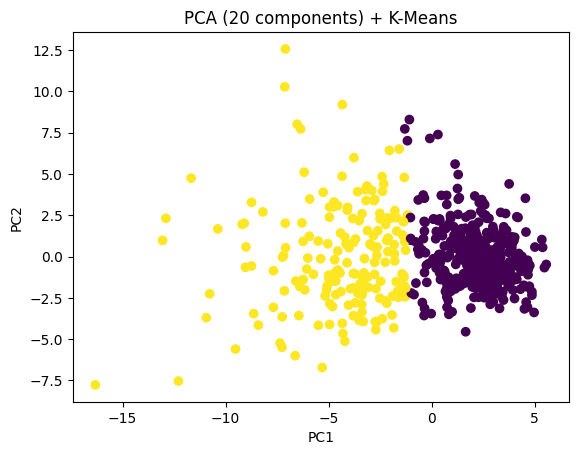

   PCA_components  Reconstruction_MSE  Explained_Variance  Silhouette  \
0               2            0.367568            0.632432    0.508469   
1               5            0.152657            0.847343    0.393223   
2              10            0.048431            0.951569    0.357745   
3              15            0.013512            0.986488    0.348322   
4              20            0.004428            0.995572    0.345859   

   Davies_Bouldin  Calinski_Harabasz          WCSS       ARI       NMI  \
0        0.846740         580.876272   5332.555574  0.659231  0.540381   
1        1.140900         345.069305   8991.825172  0.670721  0.554612   
2        1.256692         288.091573  10770.705566  0.676505  0.562021   
3        1.297854         273.089062  11365.357749  0.670721  0.554612   
4        1.304328         269.429253  11520.201082  0.676505  0.562021   

     Purity  
0  0.906854  
1  0.910369  
2  0.912127  
3  0.910369  
4  0.912127  


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------------
# SETTINGS
# ----------------------------------
pca_dims = [2, 5, 10, 15, 20]
k_opt = 2   # choose from Experiment 1 (usually 2 for cancer)

results = []

# ----------------------------------
# LOOP OVER PCA DIMENSIONS
# ----------------------------------
for n_comp in pca_dims:
    print(f"\nRunning PCA + KMeans with {n_comp} components")

    # -------- PCA --------
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X_scaled)

    # PCA quality
    recon_mse = pca.mean_squared_reconstruction_error(X_scaled)
    explained_variance = np.sum(pca.get_explained_variance())

    # -------- K-MEANS --------
    kmeans = KMeans_Scratch(
        n_clusters=k_opt,
        init_method="kmeans++"
    )
    kmeans.fit(X_pca)
    labels = kmeans.labels_

    # -------- INTERNAL METRICS --------
    sil = silhouette_score_scratch(X_pca, labels)
    db  = davies_bouldin_score_scratch(X_pca, labels)
    ch  = calinski_harabasz_score_scratch(X_pca, labels)
    wcss = kmeans.inertia_

    # -------- EXTERNAL METRICS (EVALUATION ONLY) --------
    ari = adjusted_rand_index_scratch(y, labels)
    nmi = normalized_mutual_information_scratch(y, labels)
    purity = purity_score_scratch(y, labels)

    # -------- SAVE RESULTS --------
    results.append({
        "PCA_components": n_comp,
        "Reconstruction_MSE": recon_mse,
        "Explained_Variance": explained_variance,
        "Silhouette": sil,
        "Davies_Bouldin": db,
        "Calinski_Harabasz": ch,
        "WCSS": wcss,
        "ARI": ari,
        "NMI": nmi,
        "Purity": purity
    })

    # -------- 2D VISUALIZATION (REQUIRED) --------
    X_2d = X_pca[:, :2]

    plt.figure()
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap="viridis")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(f"PCA ({n_comp} components) + K-Means")
    plt.show()

# ----------------------------------
# RESULTS TABLE
# ----------------------------------
results_df = pd.DataFrame(results)
print(results_df)


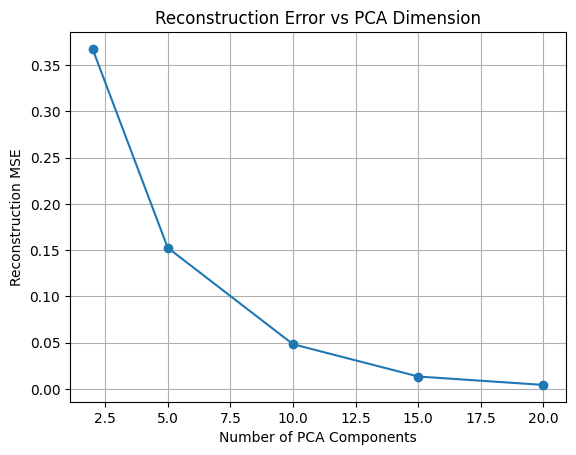

In [23]:
plt.figure()
plt.plot(
    results_df["PCA_components"],
    results_df["Reconstruction_MSE"],
    marker="o"
)
plt.xlabel("Number of PCA Components")
plt.ylabel("Reconstruction MSE")
plt.title("Reconstruction Error vs PCA Dimension")
plt.grid(True)
plt.show()


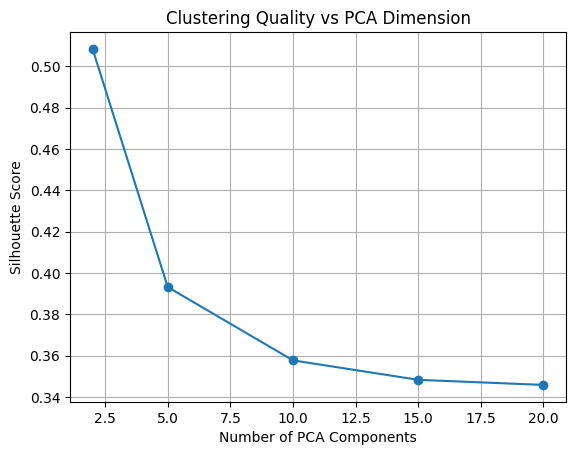

In [24]:
plt.figure()
plt.plot(
    results_df["PCA_components"],
    results_df["Silhouette"],
    marker="o"
)
plt.xlabel("Number of PCA Components")
plt.ylabel("Silhouette Score")
plt.title("Clustering Quality vs PCA Dimension")
plt.grid(True)
plt.show()


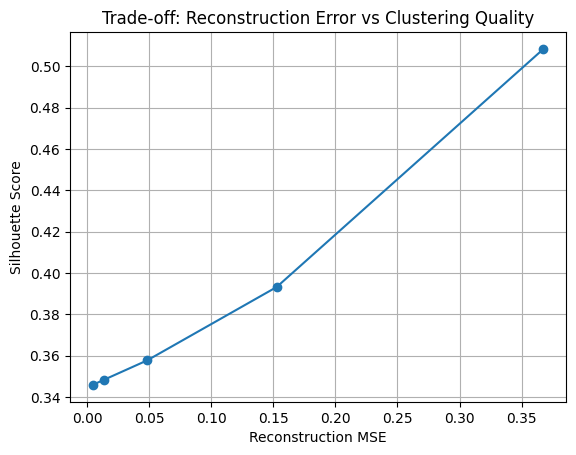

In [25]:
plt.figure()
plt.plot(
    results_df["Reconstruction_MSE"],
    results_df["Silhouette"],
    marker="o"
)
plt.xlabel("Reconstruction MSE")
plt.ylabel("Silhouette Score")
plt.title("Trade-off: Reconstruction Error vs Clustering Quality")
plt.grid(True)
plt.show()



Running Experiment 3: PCA (2 components) + KMeans


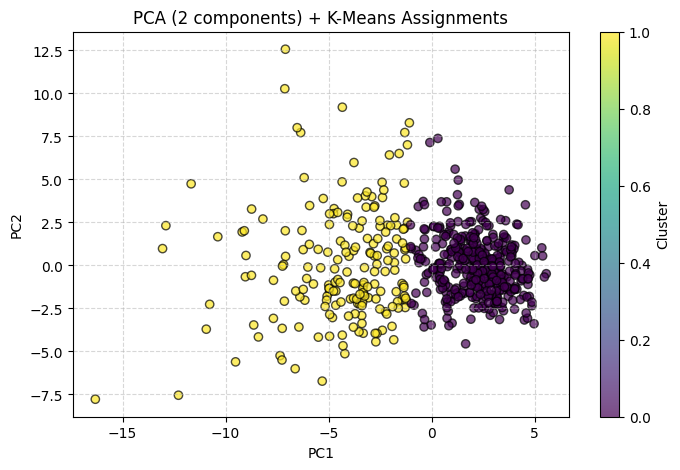


Running Experiment 3: PCA (5 components) + KMeans


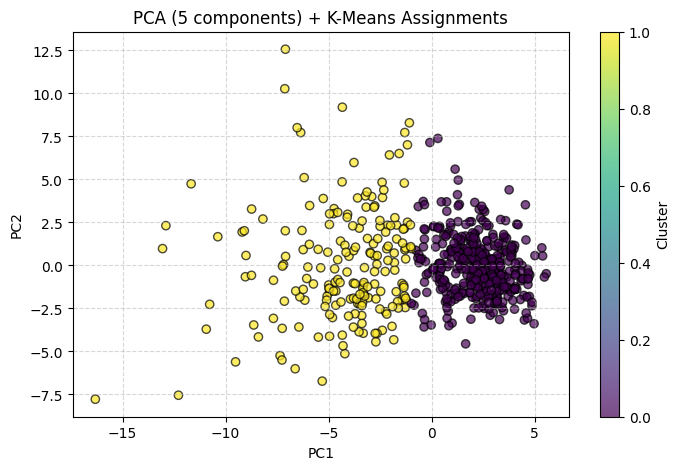


Running Experiment 3: PCA (10 components) + KMeans


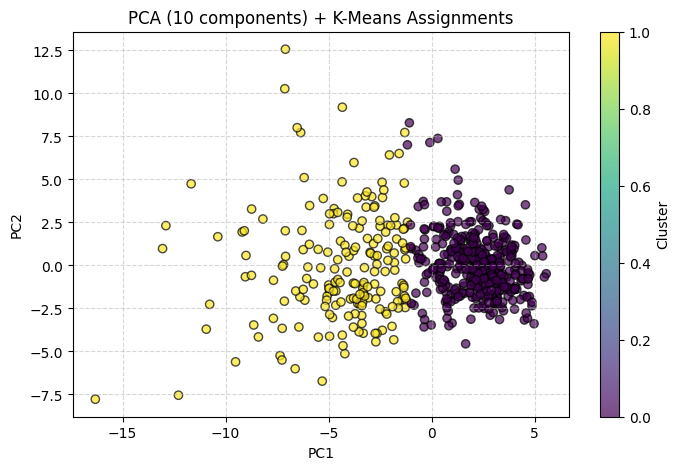


Running Experiment 3: PCA (15 components) + KMeans


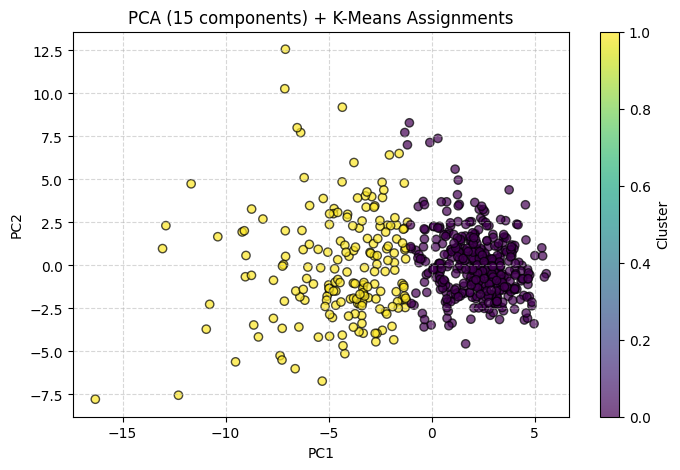


Running Experiment 3: PCA (20 components) + KMeans


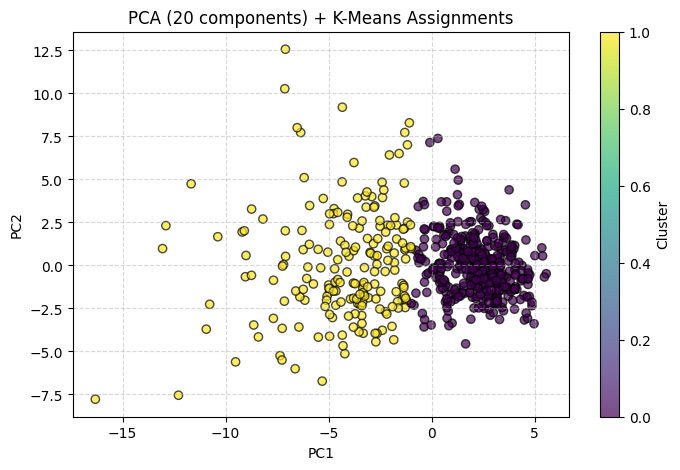

In [26]:
# =========================================================
# 3. EXPERIMENT 3: K-MEANS AFTER PCA [cite: 52]
# =========================================================
pca_dims = [2, 5, 10, 15, 20] # [cite: 53]
k_opt = 2  # Based on Breast Cancer target labels
results_exp3 = []

# Ensure data is standardized before PCA 
# Note: X_scaled and y should be defined before running this block

for n_comp in pca_dims:
    print(f"\nRunning Experiment 3: PCA ({n_comp} components) + KMeans")

    # --- Step A: PCA Reduction ---
    pca_model = PCA(n_components=n_comp) 
    X_pca = pca_model.fit_transform(X_scaled)
    recon_mse = pca_model.mean_squared_reconstruction_error(X_scaled) 
    total_var = np.sum(pca_model.get_explained_variance()) 

    # --- Step B: K-Means Clustering ---
    kmeans = KMeans_Scratch(n_clusters=k_opt, init_method="kmeans++")
    kmeans.fit(X_pca)
    labels = kmeans.labels_

    # --- Step C: Evaluation (Using scratch implementations) ---
    # Internal metrics [cite: 76-81]
    sil = silhouette_score_scratch(X_pca, labels) 
    db  = davies_bouldin_score_scratch(X_pca, labels) 
    ch  = calinski_harabasz_score_scratch(X_pca, labels) 
    wcss = kmeans.inertia_

    # External metrics (labels used for evaluation only) [cite: 83-87]
    ari = adjusted_rand_index_scratch(y, labels) 
    nmi = normalized_mutual_information_scratch(y, labels) 
    purity = purity_score_scratch(y, labels) 

    # --- Step D: Results & Visualization ---
    results_exp3.append({
        "PCA_Components": n_comp,
        "Reconstruction_MSE": recon_mse,
        "Explained_Var_Ratio": total_var,
        "Silhouette": sil,
        "Davies_Bouldin": db,
        "Calinski_Harabasz": ch,
        "WCSS": wcss,
        "ARI": ari,
        "NMI": nmi,
        "Purity": purity
    })

    # Required 2D Visualization (using first 2 dimensions) 
    plt.figure(figsize=(8, 5))
    X_vis = X_pca[:, :2] 
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.7)
    plt.title(f"PCA ({n_comp} components) + K-Means Assignments")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.colorbar(label='Cluster')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


--- Final Comparison Table (Experiment 3) ---
   PCA_Components  Reconstruction_MSE  Explained_Var_Ratio  Silhouette  \
0               2            0.367568             0.632432    0.508469   
1               5            0.152657             0.847343    0.391857   
2              10            0.048431             0.951569    0.357986   
3              15            0.013512             0.986488    0.348078   
4              20            0.004428             0.995572    0.344517   

   Davies_Bouldin  Calinski_Harabasz          WCSS       ARI       NMI  \
0        0.846740         580.876272   5332.555574  0.659231  0.540381   
1        1.148901         345.038339   8992.130463  0.653625  0.532408   
2        1.259659         288.124567  10770.289989  0.670721  0.554612   
3        1.294817         273.070876  11365.603779  0.676505  0.562021   
4        1.315558         269.443761  11520.001257  0.653625  0.532408   

     Purity  
0  0.906854  
1  0.905097  
2  0.910369  
3  0.91

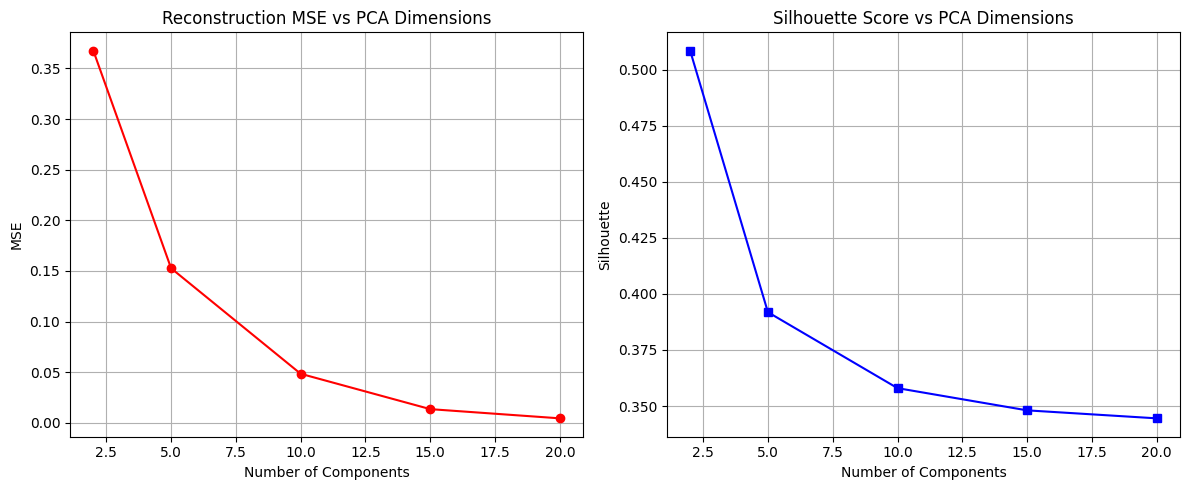

In [27]:
df_exp3 = pd.DataFrame(results_exp3)
print("\n--- Final Comparison Table (Experiment 3) ---")
print(df_exp3)

# Analysis of Trade-off: Dimensionality vs Performance [cite: 54, 55]
plt.figure(figsize=(12, 5))

# Plot 1: Reconstruction Error
plt.subplot(1, 2, 1)
plt.plot(df_exp3['PCA_Components'], df_exp3['Reconstruction_MSE'], marker='o', color='red')
plt.title("Reconstruction MSE vs PCA Dimensions")
plt.xlabel("Number of Components")
plt.ylabel("MSE")
plt.grid(True)

# Plot 2: Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(df_exp3['PCA_Components'], df_exp3['Silhouette'], marker='s', color='blue')
plt.title("Silhouette Score vs PCA Dimensions")
plt.xlabel("Number of Components")
plt.ylabel("Silhouette")
plt.grid(True)

plt.tight_layout()
plt.show()

#####  adding more dimensions introduces "noise" or spreads out the data points, making the cluster boundaries less distinct.

In [28]:
def relu(z): return np.maximum(0, z)
def relu_deriv(z): return (z > 0).astype(float)  # 1 where z > 0, else 0 

def sigmoid(z): return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
def sigmoid_deriv(z): 
    s = sigmoid(z)
    return s * (1 - s)

def tanh(z): return np.tanh(z)
def tanh_deriv(z): return 1 - np.tanh(z)**2


def identity(z): return z
def identity_deriv(z): return np.ones_like(z)

### EXP 5

In [29]:
from src.dimensionality_reduction.autoencoder import AutoEncoder


--- Running Experiment 5: Autoencoder (Bottleneck=2) + KMeans ---


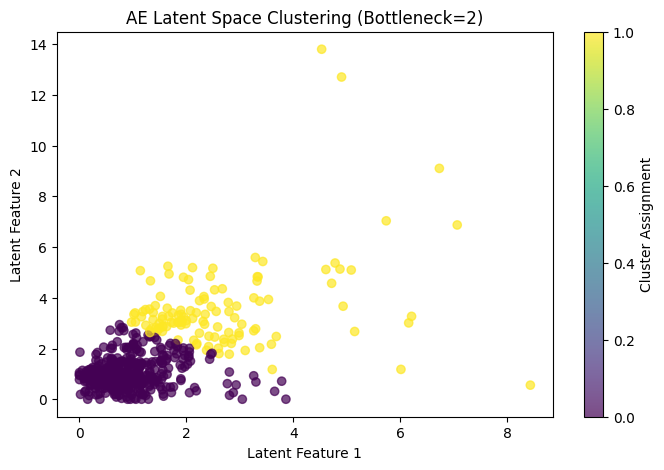


--- Running Experiment 5: Autoencoder (Bottleneck=5) + KMeans ---


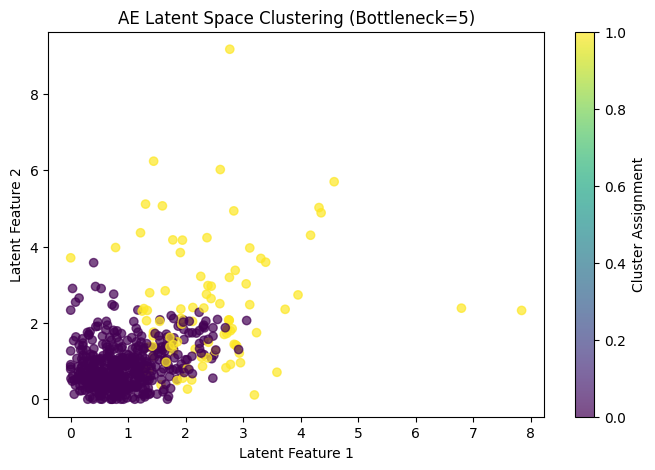


--- Running Experiment 5: Autoencoder (Bottleneck=10) + KMeans ---


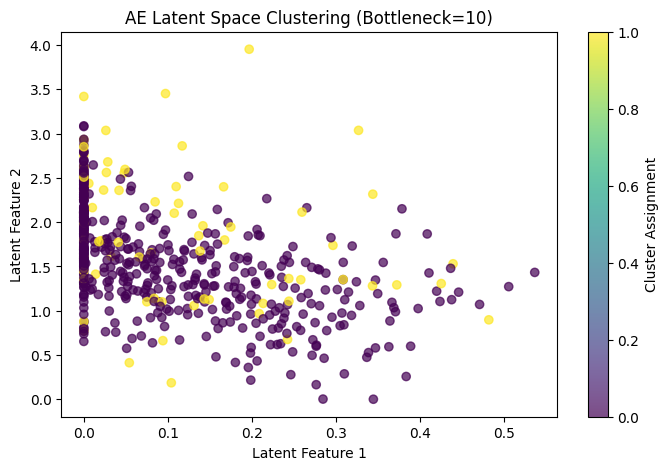


--- Running Experiment 5: Autoencoder (Bottleneck=15) + KMeans ---


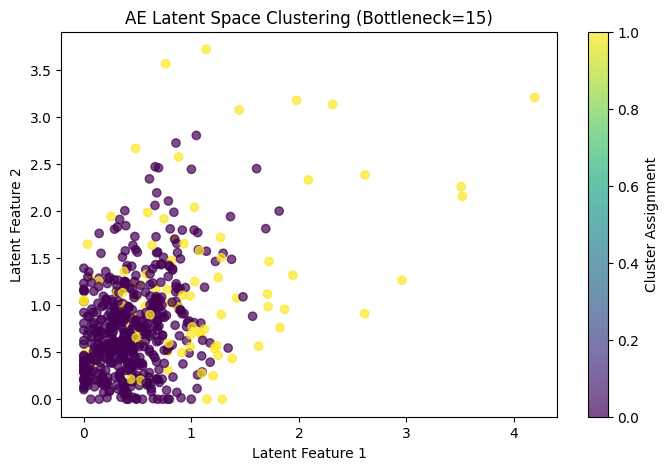


--- Running Experiment 5: Autoencoder (Bottleneck=20) + KMeans ---


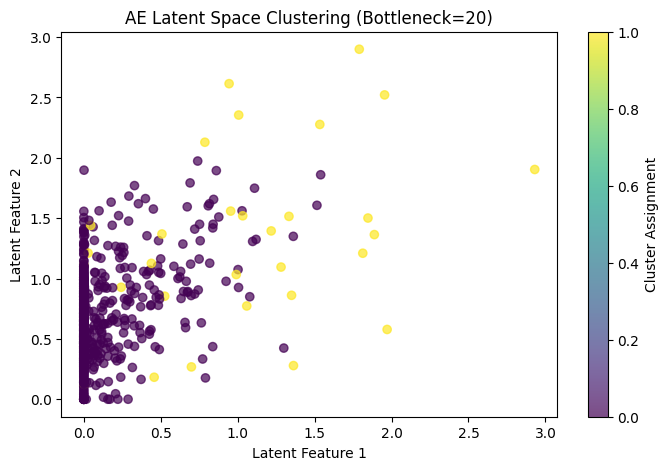


--- Experiment 5 Summary Table ---
   Bottleneck_Dim  Reconstruction_MSE  Silhouette       ARI    Purity
0               2            0.307649    0.597068  0.431125  0.833040
1               5            0.149709    0.471221  0.153471  0.711775
2              10            0.109625    0.414577  0.014407  0.627417
3              15            0.093349    0.433467  0.158072  0.715290
4              20            0.097879    0.582444  0.029299  0.641476


In [31]:
# ----------------------------------
# SETTINGS & HYPERPARAMETERS [cite: 116]
# ----------------------------------
bottleneck_dims = [2, 5, 10, 15, 20]
k_opt = 2  # Based on Experiment 1 [cite: 46]
input_dim = X_scaled.shape[1]
results_exp5 = []

# ----------------------------------
# LOOP OVER BOTTLENECK DIMENSIONS 
# ----------------------------------
for b_dim in bottleneck_dims:
    print(f"\n--- Running Experiment 5: Autoencoder (Bottleneck={b_dim}) + KMeans ---")

    # 1. Architecture: Input -> 64 -> 32 -> Bottleneck -> 32 -> 64 -> Input [cite: 18, 19]
    # This ensures hidden layers (32, 64) are always larger than the bottleneck (max 20)
    layers = [input_dim, 64, 32, b_dim, 32, 64, input_dim]
    
    # Required: Multiple activation functions (ReLU, sigmoid, tanh) [cite: 20]
    # Change the last layer from sigmoid to identity 
    activations = [
    (tanh, tanh_deriv),     # Layer 1
    (relu, relu_deriv),     # Layer 2
    (relu, relu_deriv),     # Layer 3 (Bottleneck)
    (relu, relu_deriv),     # Layer 4
    (tanh, tanh_deriv),     # Layer 5
    (identity, identity_deriv) # Final Output Layer
]

    # 2. Train Autoencoder [cite: 21, 22, 23, 24]
    # Includes backpropagation, mini-batch GD, L2 regularization, and LR scheduling
    ae = AutoEncoder(layers, activations, lr=0.01, l2=0.001)
    ae.train(X_scaled, epochs=100, batch_size=32, step_size=30, gamma=0.7)

    # 3. Extract Latent Features (The output of the bottleneck layer)
    # We pass the data through the first 3 layers (the Encoder part)
    A = X_scaled
    for i in range(3): 
        Z = A @ ae.W[i] + ae.b[i]
        A = ae.activations[i][0](Z)
    X_latent = A

    # 4. Clustering using K-Means++ [cite: 26, 59]
    kmeans = KMeans_Scratch(n_clusters=k_opt, init_method='kmeans++')
    kmeans.fit(X_latent)
    labels = kmeans.labels_

    # 5. Compute Required Metrics [cite: 75, 78, 85, 90]
    recon_mse = np.mean((X_scaled - ae.forward(X_scaled))**2)
    sil = silhouette_score_scratch(X_latent, labels)
    ari = adjusted_rand_index_scratch(y, labels)
    purity = purity_score_scratch(y, labels)

    # Save results for comparison with Experiment 3 [cite: 61, 94]
    results_exp5.append({
        "Bottleneck_Dim": b_dim,
        "Reconstruction_MSE": recon_mse,
        "Silhouette": sil,
        "ARI": ari,
        "Purity": purity
    })

    # 6. Required Visualization: 2D Projections [cite: 99, 101]
    plt.figure(figsize=(8, 5))
    # If latent space > 2D, visualize the first two latent dimensions
    plt.scatter(X_latent[:, 0], X_latent[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.title(f"AE Latent Space Clustering (Bottleneck={b_dim})")
    plt.xlabel("Latent Feature 1")
    plt.ylabel("Latent Feature 2")
    plt.colorbar(label='Cluster Assignment')
    plt.show()

# ----------------------------------
# COMPREHENSIVE COMPARISON [cite: 94]
# ----------------------------------
df_exp5 = pd.DataFrame(results_exp5)
print("\n--- Experiment 5 Summary Table ---")
print(df_exp5)